In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
df=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

In [6]:
#drop unnecessary column
df.drop('Product_Category_3',axis=1,inplace=True)

In [7]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [8]:
#drop null values
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [10]:
#replace values
df['Stay_In_Current_City_Years'].replace('4+','4',inplace=True)

/tmp/ipykernel_17/2332592908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stay_In_Current_City_Years'].replace('4+','4',inplace=True)


In [11]:
df.Stay_In_Current_City_Years.unique()

array(['2', '3', '1', '4', '0'], dtype=object)

In [12]:
#change data type
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [13]:
#check duplicate
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase


In [14]:
df.Age.unique()

array(['0-17', '26-35', '46-50', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

In [15]:
df.Occupation.unique()

array([10, 15,  7, 20,  9,  1, 12, 17,  0,  3, 16,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [16]:
df.City_Category.unique()

array(['A', 'B', 'C'], dtype=object)

In [17]:
df.Marital_Status.unique()

array([0, 1])

In [18]:
df.Product_ID.unique()

array(['P00248942', 'P00085442', 'P00193542', ..., 'P00350742',
       'P00060842', 'P00057842'], dtype=object)

In [19]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
322992,1001727,P00158242,M,36-45,16,B,2,1,6,8.0,16670
191807,1005636,P00241542,M,26-35,7,A,0,1,1,6.0,7599
474018,1001062,P00080342,M,51-55,19,C,3,0,1,6.0,19045
5920,1000960,P00265242,M,0-17,10,C,4,0,5,8.0,8864
294118,1003389,P00079742,M,18-25,0,A,0,0,1,2.0,3949


## Visualization:

<Axes: xlabel='Age', ylabel='count'>

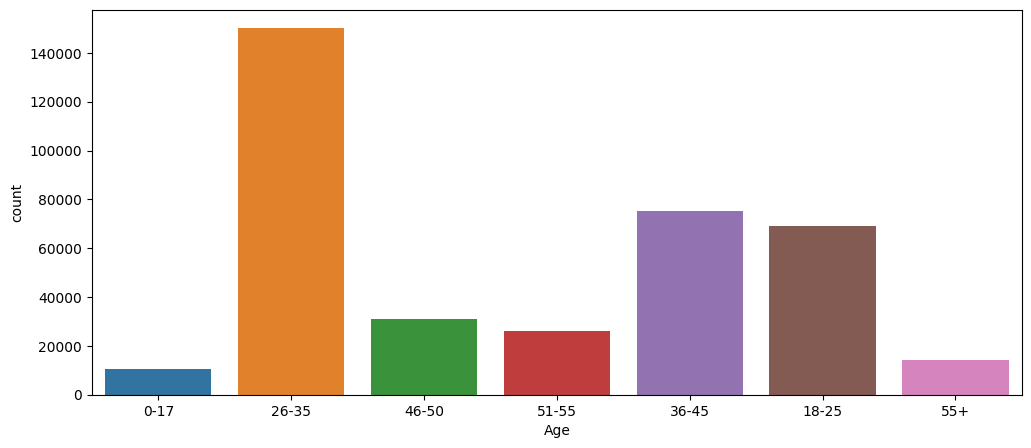

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Age')

**150000 Customers are in 26-35 age group.**

<Axes: xlabel='Gender', ylabel='count'>

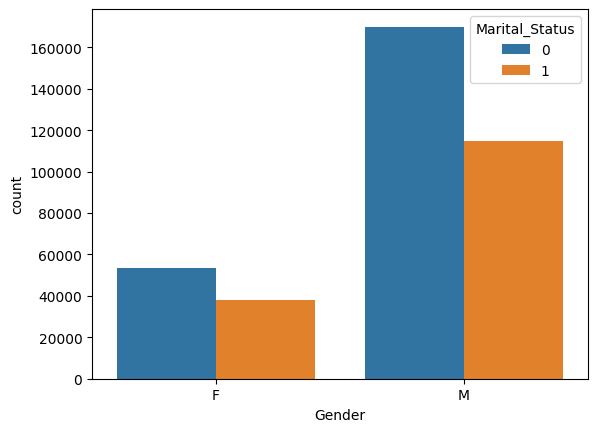

In [21]:
sns.countplot(data=df,x='Gender',hue='Marital_Status')

**From above graph, 170000 are unmarried males customers.**

<Axes: xlabel='City_Category', ylabel='count'>

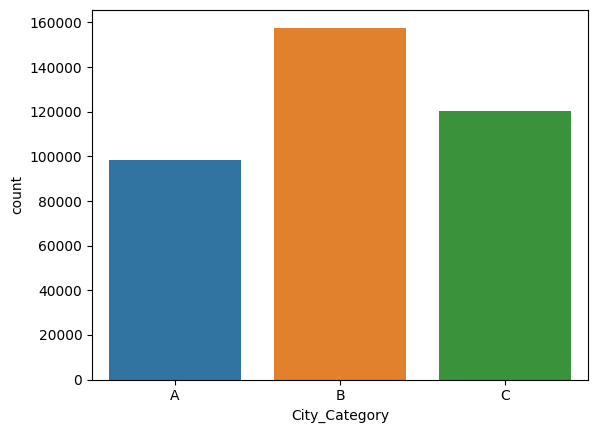

In [22]:
sns.countplot(data=df,x='City_Category')

**Nearly 155000 customers are from B City**

<Axes: xlabel='Product_Category_1', ylabel='count'>

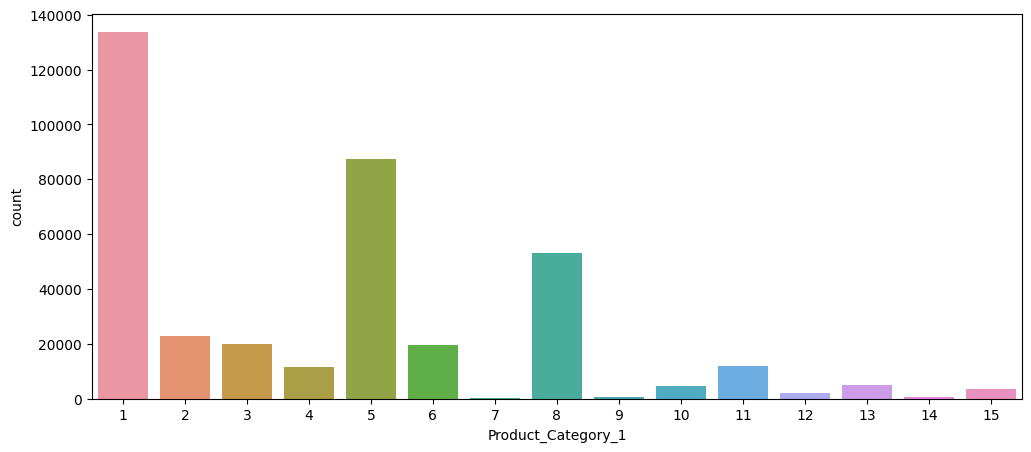

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Product_Category_1')

**From above graph, category1,category5 and category8 are top selling Categories.**

<Axes: xlabel='Age', ylabel='Purchase'>

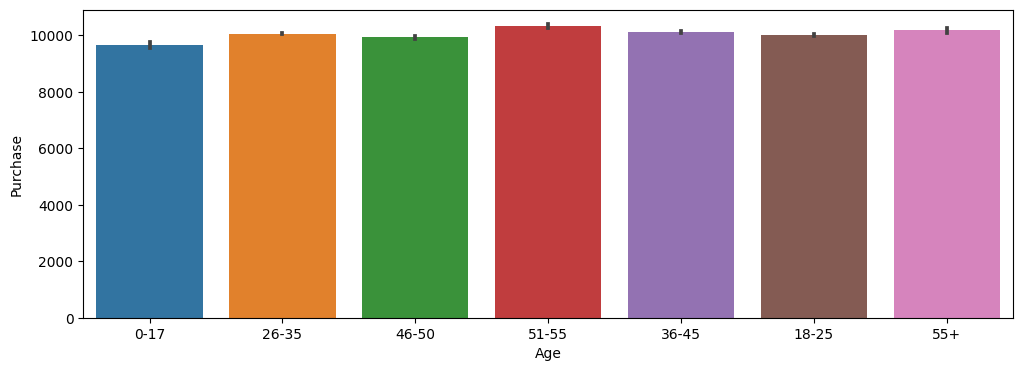

In [24]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='Age',y='Purchase')

**Approximately all Age_Groups have same purchasing strategy.**

<Axes: xlabel='Occupation', ylabel='Purchase'>

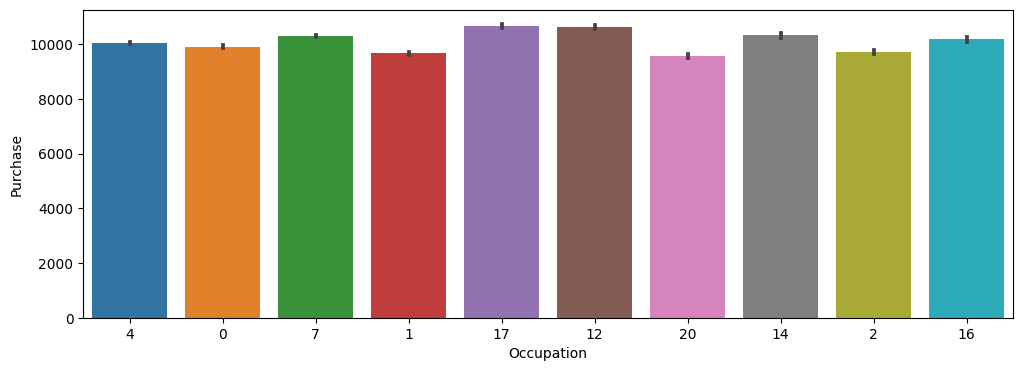

In [25]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='Occupation',y='Purchase',order=df['Occupation'].value_counts().index[:10])

**Occupation no.17 and no.12 has greater purchasing strategy.**

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

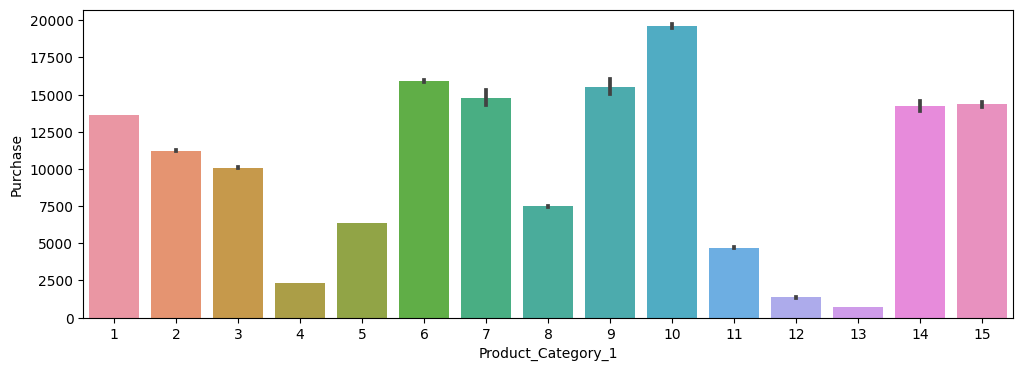

In [26]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='Product_Category_1',y='Purchase')

**From Product_Category_1 no.10 are highly purchasing category with approximetly 19000.**

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

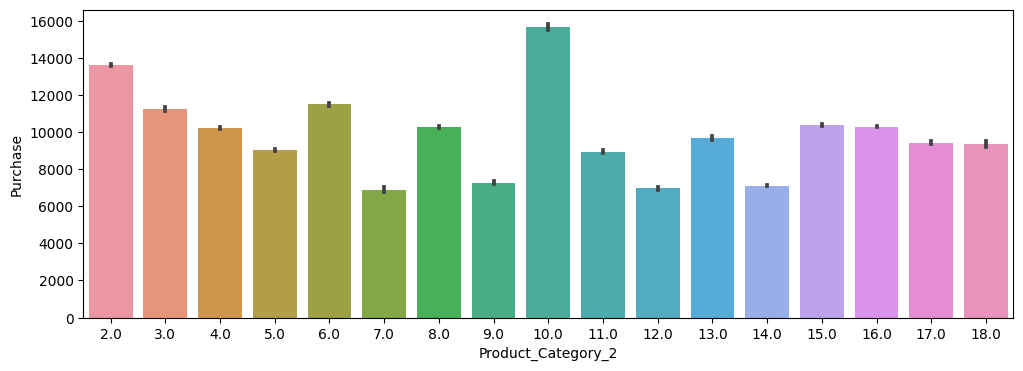

In [27]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='Product_Category_2',y='Purchase')

**From Product_Category_2 no. 10.0 are highly purchasing category with approximetly 15900.**

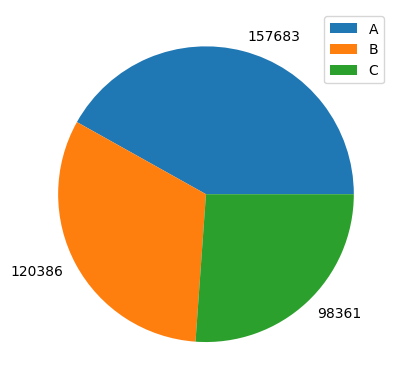

In [28]:
plt.pie(df['City_Category'].value_counts(),labels=df['City_Category'].value_counts().values,)
plt.legend(['A','B','C'])
plt.show()

**from above graph City C has highly 157683 customers.**